Author: Pierce Rotman
Course: CAP 6673
Professor: Pashaie
Date: 5 September, 2023

Mini Project 1

1.	Using the theory of regression, I plotted a linear best-fit line, using the following code. As seen, the line does not fit very well. The value of the cost function is 1.7768.

Text(0.5, 1.0, 'Linear')

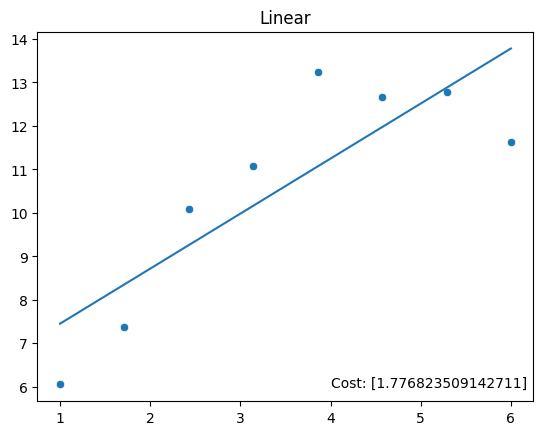

In [17]:
"""
Author: Pierce Rotman
Course: CAP 6673
Professor: Pashaie
Date: 5 September 2023

Description: Fit regression lines of various order to data set and build classifiers of various order.
"""

#imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


########
#Part 1#
########
def cost_function(x, y, lbf):
    """
    Computes the cost function of a data set where the cost function is the mean of the squared errors
    Args:
        x (list): input data
        y (list): output data
        lbf (numpy.ndarray): line of best fit as a vector
    Returns:
        E (float): mean of squared errors
    """
    e = y - x.dot(lbf)
    E = (e.transpose().dot(e)) / len(x)
    return E


def regression(input, output, order):
    """
    Calculates linear regression line
    Args:
        input (list): input data
        output (list): output data
        order (int): what order regression to compute
    Returns: 
        lbf (numpy.ndarray): line of best fit as vector
        cost (float): mean of squared errors
        X (numpy.ndarray): array of input/outputs
    """
    X = np.array([input]).transpose()
    X_cur = X
    y = np.array([output]).transpose()

    for i in range(0, order):
        if i!=0:
            X = X*X_cur
        X = np.hstack((X, np.array([[1]*len(input)]).transpose()))
    
    lbf = (np.linalg.inv(X.transpose().dot(X))).dot(X.transpose()).dot(y)

    cost = cost_function(X, y, lbf).tolist()
    return lbf, cost, X
    

#Define data set
d = [6.0532, 7.3837, 10.0891, 11.0829, 13.2337, 12.6710, 12.7772, 11.6371]
x = [1, 1.7143, 2.4286, 3.1429, 3.8571, 4.5714, 5.2857, 6]

#Run linear regression on x,d
lbf, cost, X1 = regression(x,d,1)

#Run second order regression on x,d
lbf2, cost2, X2 = regression(x,d,2)

#Run sixth order regression on x,d
lbf6, cost6, X6 = regression(x, d, 6)

fig, ax = plt.subplots()
sns.scatterplot(x=x, y=d)
sns.lineplot(x=x, y=(X1.dot(lbf).flatten()))
ax.text(4, 6, 'Cost: ' + str(cost[0]))
ax.set_title('Linear')
plt.show()

 2.	Fitting a second-order curve to the data yields a much better result. The value of the cost function is 0.211.

Text(0.5, 1.0, 'Second-Order')

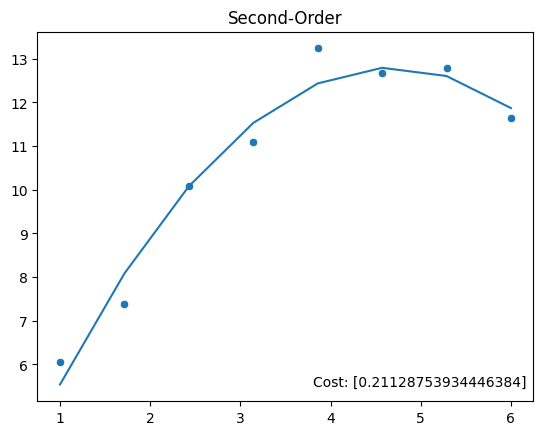

In [21]:
fig, ax = plt.subplots()
sns.scatterplot(x=x, y=d)
sns.lineplot(x=x, y=(X2.dot(lbf2).flatten()))
ax.text(3.8, 5.5, 'Cost: ' + str(cost2[0]))
ax.set_title('Second-Order')
plt.show()

3.	Fitting a sixth-order curve, we have a cost function value of 0.1032.

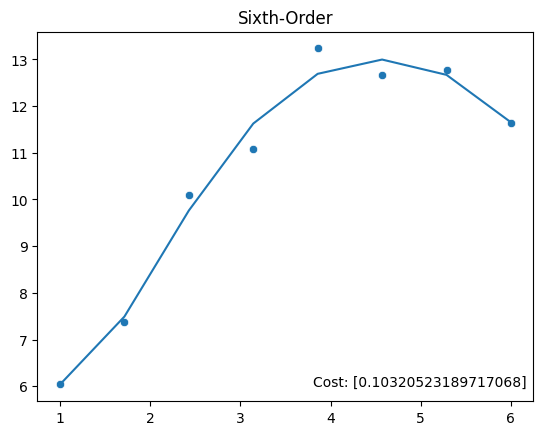

In [24]:
fig, ax = plt.subplots()
sns.scatterplot(x=x, y=d)
sns.lineplot(x=x, y=(X6.dot(lbf6).flatten()))
ax.text(3.8, 6, 'Cost: ' + str(cost6[0]))
ax.set_title('Sixth-Order')
plt.show()

4.	When we remove the point (d: 12.7772, x: 5.2857) from the data, we get this result for a sixth-order regression. The cost function value is 5.478e-12. However, we can see that the curve is completely changed, which indicates that a 6th-order polynomial is far too sensitive to use as a model for this data.

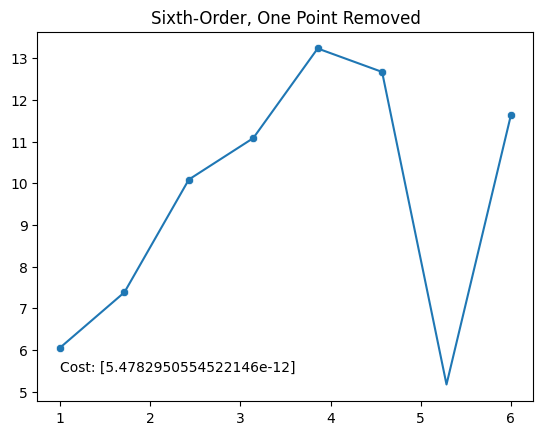

In [26]:
#Try removing a data point and rerun 6th Order Regression
x_new = [val for val in x if val != 5.2857]
d_new = [val for val in d if val != 12.7772]



lbf6_new, cost6_new, X6_new = regression(x_new, d_new, 6)

fig, ax = plt.subplots()

sns.scatterplot(x=x_new, y=d_new)
sns.lineplot(x=x, y=(X6.dot(lbf6_new).flatten()))
ax.text(1, 5.5, 'Cost: ' + str(cost6_new[0]))
ax.set_title('Sixth-Order, One Point Removed')

plt.show()


5.	First, we display the regression plots for orders 1 through 10. Then, on the right, we have the graphs and cost values for each order if we add the point (5.5555, 10.1010) to the data. This will help us determine the volatility of each model.

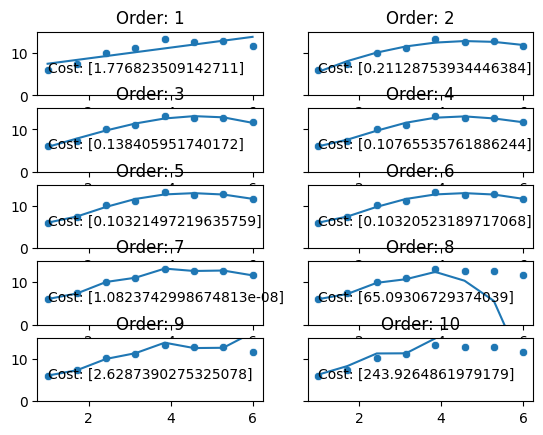

In [28]:
lbf_list = []
cost_list = []
matrix_list = []

for i in range(1, 11):
    lbf_i, cost_i, matrix_i = regression(x,d,i)
    lbf_list.append(lbf_i)
    cost_list.append(cost_i[0])
    matrix_list.append(matrix_i)



fig, axs = plt.subplots(5,2, sharey=True)

i = 1
for axis in axs.flatten():
    sns.scatterplot(x=x, y=d, ax = axis)
    sns.lineplot(x=x, y=(matrix_list[i-1].dot(lbf_list[i-1])).flatten(), ax = axis)
    axis.text(1, 5.5, 'Cost: ' + str(cost_list[i-1]))
    axis.set_title('Order: ' + str(i))
    i+=1
plt.ylim((0,15))
plt.show()


We also have a graph of cost vs order for the original data.

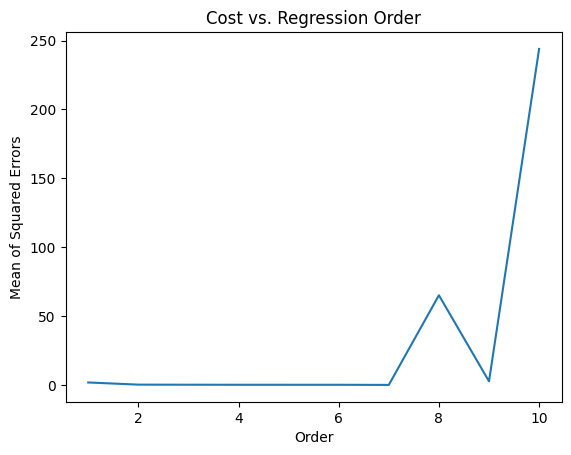

In [29]:
#Graph cost as a function of regression order
fig3, ax = plt.subplots()
sns.lineplot(x=range(1,11), y= np.array(cost_list).flatten())
ax.set_title('Cost vs. Regression Order')
ax.set_xlabel('Order')
ax.set_ylabel('Mean of Squared Errors')
plt.show()

It appears that orders of at least three are overfit to the data. These regression plots, while having a low cost, change drastically when a point is added or removed from the data set. Thus, they are not well-suited to modeling the data. The linear regression is very clearly underfit to the data. The cost is high and does not allow for good predictability in modeling. Therefore, the best model to use for the data is the 2nd-order polynomial, which roughly fits the data and is not subject to large changes when the data set is altered.

Part II:
1.	Using a linear decision line and the logistic regression algorithm, we get the following decision curve, which separates the data.

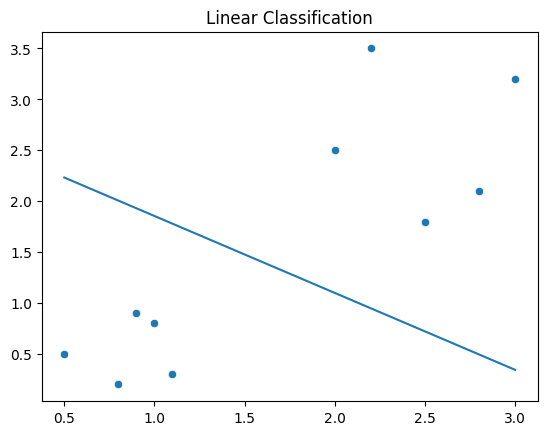

In [31]:
########
#Part 2#
########

def logistic(X, W):
    """
    Calculates the logistic function values given a data set X and weights W
    Args: 
        X (numpy.ndarray): data set
        W (numpy.ndarray): weights
    Returns:
        fofx (list): logistic function values for X.transpose().dot(W)
    """
    #print(X, W)
    neg_xt_w = X.transpose().dot(W)
    #print(neg_xt_w)
    fofx = [1 / (1 + math.exp(-1*neg_xt_w[i, 0])) for i in range(len(neg_xt_w))]
    return fofx


def cost_minimization(X, d, W):
    """
    Uses the method of steepest descent to minimize the cost of the model and returns adjusted weights
    Args:
        X (numpy.ndarray): data set
        d (numpy.ndarray): desired output
        W (numpy.ndarray): weights
    Returns:
        W (numpy.ndarray): new weights
    """

    for i in range(1000):
        
        current_logistic = np.array([logistic(X, W)]).transpose()
        #print(current_logistic.shape)
        #calculate gradient
        gradient = 0.5*(X.dot(current_logistic-d))
        #print(gradient.shape)
        #print(gradient)
        W = W-gradient

    return W



ones = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
x1 = [0.5, 0.8, 0.9, 1.0, 1.1, 2.0, 2.2, 2.5, 2.8, 3.0]
x2 = [0.5, 0.2, 0.9, 0.8, 0.3, 2.5, 3.5, 1.8, 2.1, 3.2]
d = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]]).transpose()

w = [10, 10, 10]
W = np.array([w]).transpose()
X = np.array([ones, x1 , x2])


W = cost_minimization(X, d, W)

sns.scatterplot(x = x1, y = x2)
xvals = np.linspace(min(x1), max(x1), 100)
sns.lineplot(x = xvals, y = -(W[1]*xvals + W[0])/W[2])
plt.title("Linear Classification")
plt.show()

2.	Using a quadratic decision curve, we get the following.

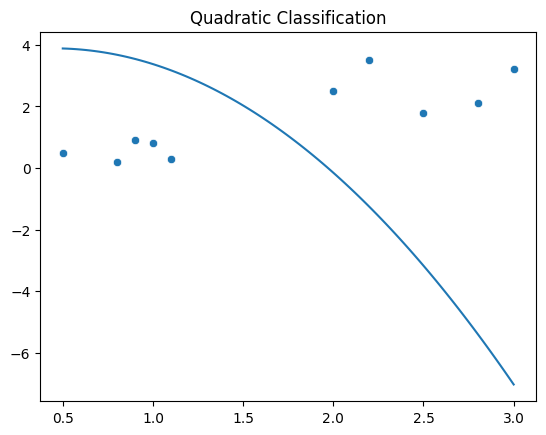

In [32]:
def quadratic_classification(input, output, W, d):
    """
    Creates a logistic classifier for a set of data using a 2nd order decision line and plots it
    Args:
        input (list): data input values
        output (list): data output values
        W (numpy.ndarray): weights
        d (numpy.ndarray): desired output
    """
    X = np.array([[1]*len(input), [x for x in input], [x for x in output], [x**2 for x in input]])
    
    W_new = cost_minimization(X, d, W)


    sns.scatterplot(x=input, y=output)
    xvals = np.linspace(min(input), max(input), 100)
    sns.lineplot(x=xvals, y=-(W_new[0] + W_new[1]*xvals + W_new[3]*(xvals**2)) / W_new[2])
    plt.title("Quadratic Classification")
    plt.show()

quadratic_classification(x1, x2, np.array([[10, 10, 10, 10]]).transpose(), d)

In comparing these classifiers, I input additional values and outliers. Neither model is particularly predictable with the small data set we begin with. However, both adjust well to outliers and do not substantially change the model. In order to choose which classifier is better suited, I believe I would need to see them applied to much larger data sets. However, my initial instinct is to select the linear classifier in order to avoid over-fitting the data, and allowing for smaller adjustments to the classifier.